In [2]:
#Artigos publicados pelo ITA de 2011 a 2019
#260 document results
#AF-ID ( "universidade de são paulo" 60008088 ) AND SUBJAREA ( engi ) AND ( LIMIT-TO ( PUBYEAR , 2019 ) OR LIMIT-TO ( PUBYEAR , 2018 ) OR LIMIT-TO ( PUBYEAR , 2017 ) OR LIMIT-TO ( PUBYEAR , 2016 ) OR LIMIT-TO ( PUBYEAR , 2015 ) OR LIMIT-TO ( PUBYEAR , 2014 ) OR LIMIT-TO ( PUBYEAR , 2013 ) OR LIMIT-TO ( PUBYEAR , 2012 ) OR LIMIT-TO ( PUBYEAR , 2011 ) )
#Adaptado de https://www.kaggle.com/ajaymanwani/hottest-topics-in-machine-learning-using-nips-data

# Importing modules
import pandas as pd
import os



## Carregando os artigos

In [4]:

# Read datasets/papers.csv into papers
papers = pd.read_csv('scopus_USP_2011_2019_qtd12894.csv', error_bad_lines=False)
# Print out the first rows of papers
print(papers.head())

b'Skipping line 7079: expected 19 fields, saw 20\nSkipping line 7080: expected 19 fields, saw 20\nSkipping line 7081: expected 19 fields, saw 20\nSkipping line 7082: expected 19 fields, saw 20\nSkipping line 7083: expected 19 fields, saw 20\nSkipping line 7084: expected 19 fields, saw 20\n'


                                             Authors  ...                 EID
0       Torraga, M.G.F., Colmán, M.M.E., Giudici, R.  ...  2-s2.0-85072861042
1  Kadivar, M., Gauss, C., Mármol, G., de Sá, A.D...  ...  2-s2.0-85072281899
2      dos Santos Macedo, R., Ulsen, C., Mueller, A.  ...  2-s2.0-85072212510
3            Besse, R., Lima, M.P., Da Silva, J.L.F.  ...  2-s2.0-85076749605
4  Nigro, P.S.B., Simões, E.T., Pimenta, P.M., Sc...  ...  2-s2.0-85070755433

[5 rows x 19 columns]


In [ ]:
papers.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

## Preparando os dados para análise

In [5]:
# Remove the columns
papers.drop(['Authors', 'Author(s) ID','Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Publication Stage', 'Open Access', 'EID'], axis=1, inplace=True)

# Print out the first rows of papers
papers.head()

,Title,Year,Source title,Document Type,Source
0,"Hydrolysis of acetic anhydride: In situ, real-...",2019,Chemical Engineering Science,Article,Scopus
1,The influence of the initial moisture content ...,2019,Construction and Building Materials,Article,Scopus
2,Quantification of residual cement paste on rec...,2019,Construction and Building Materials,Article,Scopus
3,First-Principles Exploration of Two-Dimensiona...,2019,ACS Applied Energy Materials,Article,Scopus
4,Model order reduction with Galerkin projection...,2019,International Journal for Numerical Methods in...,Article,Scopus


## Plotar como a pesquisa em Engenharia evoluiu de 2011 a 2019 

In [6]:
papers.columns

Index(['Title', 'Year', 'Source title', 'Document Type', 'Source'], dtype='object')

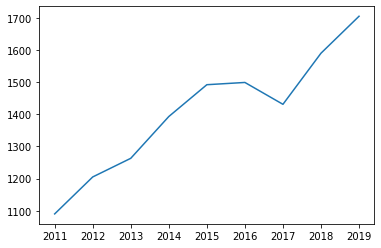

In [7]:
# Group the papers by year
groups = papers.groupby(['Year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.plot(counts)

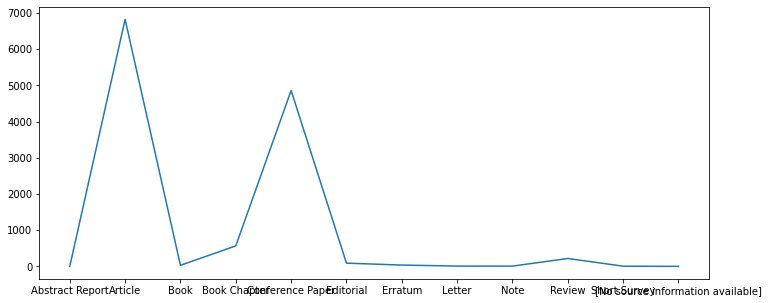

In [8]:
# Group the papers by year
groups = papers.groupby(['Document Type'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(counts) ## This is your plot
plt.show()


In [9]:
# Group the papers by source
groups = papers.groupby(['Source title']).size()
sorted_groups = groups.sort_values(ascending=False).head(10)

sorted_groups


Source title
European Physical Journal C                                                                        320
Materials Research                                                                                 213
Proceedings of SPIE - The International Society for Optical Engineering                            182
Materials Science Forum                                                                            180
Proceedings of the International Conference on Offshore Mechanics and Arctic Engineering - OMAE    161
ECS Transactions                                                                                   153
IEEE Latin America Transactions                                                                    146
Journal of Cleaner Production                                                                      143
Journal of Alloys and Compounds                                                                    118
Journal of the Brazilian Society of Mechanical Sciences and 

## Pre-processamento do titulos de cada artigo

In [10]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Title'].head())

# Remove punctuation
papers['title_processed'] = papers['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0    Hydrolysis of acetic anhydride: In situ, real-...
1    The influence of the initial moisture content ...
2    Quantification of residual cement paste on rec...
3    First-Principles Exploration of Two-Dimensiona...
4    Model order reduction with Galerkin projection...
Name: Title, dtype: object
                                               Title  ...                                    title_processed
0  Hydrolysis of acetic anhydride: In situ, real-...  ...  hydrolysis of acetic anhydride: in situ real-t...
1  The influence of the initial moisture content ...  ...  the influence of the initial moisture content ...
2  Quantification of residual cement paste on rec...  ...  quantification of residual cement paste on rec...
3  First-Principles Exploration of Two-Dimensiona...  ...  first-principles exploration of two-dimensiona...
4  Model order reduction with Galerkin projection...  ...  model order reduction with galerkin projection...

[5 rows x 6 columns]


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Nuvem de palavras das pesquisas

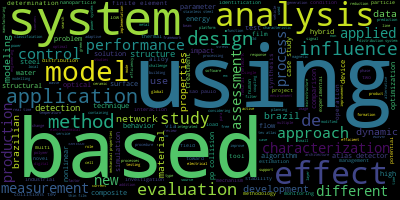

In [12]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o texto para a análise via LDA - Tópicos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


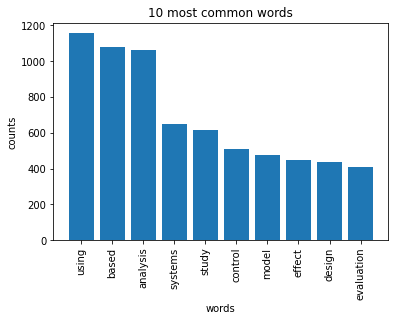

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar as tendencias com LDA

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
effect flow steel using heat influence experimental surface study alloy

Topic #1:
using analysis phase based distributed neural networks method artificial load

Topic #2:
systems based control time using power model linear approach networks

Topic #3:
da brazil em management paulo study brazilian são carbon production

Topic #4:
analysis based using finite model element concrete dynamic approach applied

Topic #5:
based films devices soi gate influence layer using oxide model

Topic #6:
atlas detector collisions tev proton production pp measurement search using

Topic #7:
properties nanoparticles using doped characterization based acid composites synthesis influence

Topic #8:
laser low therapy effects fracture evaluation level analysis high behavior

Topic #9:
case study performance analysis brazilian review process data brazil design


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# ***Análise*** a partir das revistas em que os artigos foram publicados***

## Pre-processamento do nome das revistas de cada artigo

In [15]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Source title'].head())

# Remove punctuation
papers['title_processed'] = papers['Source title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0                         Chemical Engineering Science
1                  Construction and Building Materials
2                  Construction and Building Materials
3                         ACS Applied Energy Materials
4    International Journal for Numerical Methods in...
Name: Source title, dtype: object
                                               Title  ...                                    title_processed
0  Hydrolysis of acetic anhydride: In situ, real-...  ...                       chemical engineering science
1  The influence of the initial moisture content ...  ...                construction and building materials
2  Quantification of residual cement paste on rec...  ...                construction and building materials
3  First-Principles Exploration of Two-Dimensiona...  ...                       acs applied energy materials
4  Model order reduction with Galerkin projection...  ...  international journal for numerical methods in...

[5 rows x 6 columns]


## Nuvem de palavras sobre as revistas

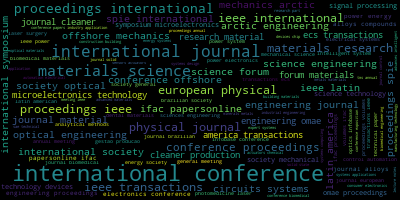

In [16]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o nome das revistas para análise via LDA




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


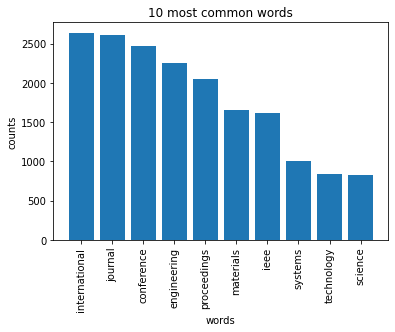

In [17]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar Tendencias de revistas com LDA

In [18]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
research materials power energy producao ieee technology 2013 symposium advanced

Topic #1:
proceedings engineering conference international mechanics materials ifac offshore annual ieee

Topic #2:
materials science engineering forum design technology symposium industrial systems applications

Topic #3:
international conference proceedings ieee 2014 2018 engineering symposium 2015 applied

Topic #4:
journal european physical engineering structures procedia letters american solids computers

Topic #5:
journal engineering sciences technology science processing mechanical international society food

Topic #6:
journal systems international production conference intelligent 2012 methods control cleaner

Topic #7:
international proceedings optical conference society engineering materials spie 2019 ieee

Topic #8:
transactions ieee conference latin safety proceedings america international ecs sensors

Topic #9:
conference electronics optics biomedical power pa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
